In [1]:
from nltk.corpus import brown
import csv

filtered_sentences = [' '.join(sent) for sent in brown.sents() if 1<=len(sent)<=10]

with open('brown_filtered.csv','w',newline='') as csvfile:
    writer = csv.writer(csvfile)
    for sentence in filtered_sentences:
        writer.writerow([sentence])

In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/working/brown_filtered.csv")
df.head()

,Merger proposed
0,Wards protected
1,Ask jail deputies
2,( 2 )
3,His petition charged mental cruelty .
4,"The couple was married Aug. 2 , 1913 ."


In [3]:
df.isna().sum()

Merger proposed    0
dtype: int64

In [4]:
df.columns

Index(['Merger proposed'], dtype='object')

In [5]:
df.rename(columns={'Merger proposed' : 'sentence'}, inplace = True)

In [6]:
df.columns

Index(['sentence'], dtype='object')

In [7]:
import re
import nltk

def cleaning_word(word):
    return re.sub(r'[^a-zA-Z]', '', word.lower())
    
def cleaning_sentence(sentence):
    return [cleaning_word(word) for word in sentence.split() if cleaning_word(word)]

df['cleaned_sentence'] = df['sentence'].apply(cleaning_sentence)

def nltk_tokenizer(sentence):
    return nltk.word_tokenize(" ".join(sentence))

df['tokens'] = df['cleaned_sentence'].apply(nltk_tokenizer)

df[['sentence','cleaned_sentence','tokens']].head()

,sentence,cleaned_sentence,tokens
0,Wards protected,"[wards, protected]","[wards, protected]"
1,Ask jail deputies,"[ask, jail, deputies]","[ask, jail, deputies]"
2,( 2 ),[],[]
3,His petition charged mental cruelty .,"[his, petition, charged, mental, cruelty]","[his, petition, charged, mental, cruelty]"
4,"The couple was married Aug. 2 , 1913 .","[the, couple, was, married, aug]","[the, couple, was, married, aug]"


In [8]:
empty_list_count = df['tokens'].apply(lambda x: len(x) == 0).sum()

print(f"Number of empty token lists: {empty_list_count}")

Number of empty token lists: 507


In [9]:
df

,sentence,cleaned_sentence,tokens
0,Wards protected,"[wards, protected]","[wards, protected]"
1,Ask jail deputies,"[ask, jail, deputies]","[ask, jail, deputies]"
2,( 2 ),[],[]
3,His petition charged mental cruelty .,"[his, petition, charged, mental, cruelty]","[his, petition, charged, mental, cruelty]"
4,"The couple was married Aug. 2 , 1913 .","[the, couple, was, married, aug]","[the, couple, was, married, aug]"
...,...,...,...
14044,`` See that guy '' ? ?,"[see, that, guy]","[see, that, guy]"
14045,The operator asked pityingly .,"[the, operator, asked, pityingly]","[the, operator, asked, pityingly]"
14046,"Compassionately yours ,","[compassionately, yours]","[compassionately, yours]"
14047,S. J. Perelman,"[s, j, perelman]","[s, j, perelman]"


In [10]:
df_cleaned = df[df['tokens'].apply(lambda x: len(x) > 0)]

print(f"Number of rows after removing empty token lists: {len(df_cleaned)}")


Number of rows after removing empty token lists: 13542


In [11]:
df_cleaned = df_cleaned.drop('sentence', axis = 1)
df_cleaned

,cleaned_sentence,tokens
0,"[wards, protected]","[wards, protected]"
1,"[ask, jail, deputies]","[ask, jail, deputies]"
3,"[his, petition, charged, mental, cruelty]","[his, petition, charged, mental, cruelty]"
4,"[the, couple, was, married, aug]","[the, couple, was, married, aug]"
5,"[the, mayors, present, term, of, office, expir...","[the, mayors, present, term, of, office, expir..."
...,...,...
14044,"[see, that, guy]","[see, that, guy]"
14045,"[the, operator, asked, pityingly]","[the, operator, asked, pityingly]"
14046,"[compassionately, yours]","[compassionately, yours]"
14047,"[s, j, perelman]","[s, j, perelman]"


BIGRAMS

In [12]:
from nltk.util import ngrams
from collections import Counter

def generate_ngrams(tokens, n = 2):
    return list(ngrams(tokens, n))

n = 2
df_cleaned['bigrams'] = df_cleaned['tokens'].apply(lambda x: generate_ngrams(x, n))

def create_input_target_pairs(ngrams_list):
    input_targets = []
    for ngram in ngrams_list:
        input_targets.append((ngram[:-1], ngram[-1]))
    return input_targets

df_cleaned['input_target_pairs'] = df_cleaned['bigrams'].apply(create_input_target_pairs)

df_cleaned.head()

,cleaned_sentence,tokens,bigrams,input_target_pairs
0,"[wards, protected]","[wards, protected]","[(wards, protected)]","[((wards,), protected)]"
1,"[ask, jail, deputies]","[ask, jail, deputies]","[(ask, jail), (jail, deputies)]","[((ask,), jail), ((jail,), deputies)]"
3,"[his, petition, charged, mental, cruelty]","[his, petition, charged, mental, cruelty]","[(his, petition), (petition, charged), (charge...","[((his,), petition), ((petition,), charged), (..."
4,"[the, couple, was, married, aug]","[the, couple, was, married, aug]","[(the, couple), (couple, was), (was, married),...","[((the,), couple), ((couple,), was), ((was,), ..."
5,"[the, mayors, present, term, of, office, expir...","[the, mayors, present, term, of, office, expir...","[(the, mayors), (mayors, present), (present, t...","[((the,), mayors), ((mayors,), present), ((pre..."


In [13]:
def flatten_input_target_pairs(input_target_pairs):
    flattened_pairs = [(input[0], target) for input, target in input_target_pairs]
    return flattened_pairs

df_cleaned['flattened_input_target_pairs'] = df_cleaned['input_target_pairs'].apply(flatten_input_target_pairs)

df_cleaned[['flattened_input_target_pairs']].head()


,flattened_input_target_pairs
0,"[(wards, protected)]"
1,"[(ask, jail), (jail, deputies)]"
3,"[(his, petition), (petition, charged), (charge..."
4,"[(the, couple), (couple, was), (was, married),..."
5,"[(the, mayors), (mayors, present), (present, t..."


In [14]:
from collections import Counter

all_words = []

for pairs in df_cleaned['flattened_input_target_pairs']:
    for input_word, target_word in pairs:
        all_words.append(input_word)
        all_words.append(target_word)

word_freq = Counter(all_words)

special_tokens = ['<unk>', '<pad>']
vocab_words = special_tokens + sorted(word_freq.keys())

word_to_idx = {word: idx for idx, word in enumerate(vocab_words)}
idx_to_word = {idx: word for word, idx in word_to_idx.items()}

print("Vocab size:", len(word_to_idx))
print("testing manual vocab mappings:")
for word in list(word_to_idx.keys())[:10]:
    print(f"{word} --> {word_to_idx[word]}")

Vocab size: 11430
testing manual vocab mappings:
<unk> --> 0
<pad> --> 1
a --> 2
aah --> 3
aback --> 4
abdomen --> 5
abel --> 6
aberrant --> 7
aberration --> 8
abide --> 9


In [15]:
def word_to_index(word, vocab):
    return vocab.get(word, vocab['<unk>'])

indexed_pairs = []

for pairs in df_cleaned['flattened_input_target_pairs']:
    for input_word, target_word in pairs:
        input_indices = word_to_index(input_word, word_to_idx)
        target_index = word_to_index(target_word, word_to_idx)
        indexed_pairs.append((input_indices, target_index))

print("Sample of indexed pairs")
for pair in indexed_pairs[:10]:
    print(pair)

Sample of indexed pairs
(11022, 7814)
(540, 5314)
(5314, 2632)
(4728, 7331)
(7331, 1614)
(1614, 6230)
(6230, 2366)
(10186, 2269)
(2269, 11041)
(11041, 6101)


In [16]:
import torch
from torch.utils.data import Dataset, DataLoader

class NgramDataset(Dataset):
    def __init__(self, indexed_pairs):
        self.indexed_pairs = indexed_pairs

    def __len__(self):
        return len(self.indexed_pairs)

    def __getitem__(self, idx):
        input_seq, target = self.indexed_pairs[idx]

        if isinstance(input_seq, int):
            input_seq = [input_seq]

        return torch.tensor(input_seq, dtype=torch.long), torch.tensor(target, dtype=torch.long)


In [17]:
from torch.nn.utils.rnn import pad_sequence

def collate_fn(batch):
    inputs, targets = zip(*batch)

    inputs = [torch.tensor(inp, dtype=torch.long) if not torch.is_tensor(inp) else inp for inp in inputs]
    targets = [torch.tensor(tgt, dtype=torch.long) if not torch.is_tensor(tgt) else tgt for tgt in targets]

    padded_inputs = pad_sequence(inputs, batch_first=True, padding_value=1)
    targets = torch.stack(targets)

    return padded_inputs, targets


dataset = NgramDataset(indexed_pairs)

batch_size = 64
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, collate_fn=collate_fn)

for inputs, targets in dataloader:
    print(f"Batch Inputs: {inputs}")
    print(f"Batch Targets: {targets}")
    break

Batch Inputs: tensor([[   69],
        [10186],
        [10186],
        [  966],
        [ 4459],
        [  877],
        [ 2903],
        [  389],
        [  825],
        [ 5451],
        [ 6890],
        [ 8301],
        [ 6759],
        [ 4655],
        [ 7209],
        [10186],
        [10186],
        [ 4256],
        [ 8506],
        [    2],
        [11326],
        [  482],
        [10395],
        [ 6137],
        [ 6134],
        [ 4988],
        [ 8641],
        [10179],
        [ 6786],
        [ 6749],
        [ 2427],
        [11399],
        [10186],
        [ 3025],
        [ 6065],
        [ 5292],
        [  284],
        [  376],
        [ 9592],
        [ 9488],
        [11283],
        [ 5292],
        [ 4988],
        [ 4577],
        [ 6590],
        [11399],
        [ 4602],
        [11399],
        [ 7069],
        [ 4988],
        [ 7445],
        [ 3877],
        [10186],
        [ 5626],
        [    2],
        [ 9955],
        [10186],
        [10792],


In [18]:
import torch.nn as nn

class LanguageModel(nn.Module):
    def __init__(self, vocab_size, embed_size, context_size):
        super(LanguageModel, self).__init__()

        self.embeddings = nn.Embedding(vocab_size, embed_dim, padding_idx = 1)
        self.linear1 = nn.Linear(embed_dim * context_size, 128)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs)
        embeds = embeds.view(embeds.size(0), -1)
        output = self.linear1(embeds)
        output = self.relu(output)
        output = self.linear2(output)
        return output

In [29]:
vocab_size = len(word_to_idx)
embed_dim = 64
context_size = 1

model = LanguageModel(vocab_size, embed_dim, context_size)

In [30]:
import torch.optim as optim

total_epochs = 7
learning_rate = 0.001

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [31]:
epoch_loss = []
epoch_acc = []

for epoch in range(total_epochs):
    total_loss = 0
    correct = 0
    total = 0

    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        #now calculating accuracy without loss.backward()
        _, predicted = torch.max(outputs, dim = 1)
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

    avg_loss = total_loss / len(dataloader)
    acc = correct / total * 100

    epoch_loss.append(avg_loss)
    epoch_acc.append(acc)
    
    print(f'''Epoch = {epoch+1}/{total_epochs}
              Loss = {avg_loss:.4f}
              Accuracy = {acc:.2f}''')

Epoch = 1/7
              Loss = 7.3963
              Accuracy = 5.66
Epoch = 2/7
              Loss = 6.2774
              Accuracy = 7.34
Epoch = 3/7
              Loss = 5.7499
              Accuracy = 8.68
Epoch = 4/7
              Loss = 5.2872
              Accuracy = 9.90
Epoch = 5/7
              Loss = 4.8981
              Accuracy = 12.05
Epoch = 6/7
              Loss = 4.6169
              Accuracy = 14.35
Epoch = 7/7
              Loss = 4.4230
              Accuracy = 16.30


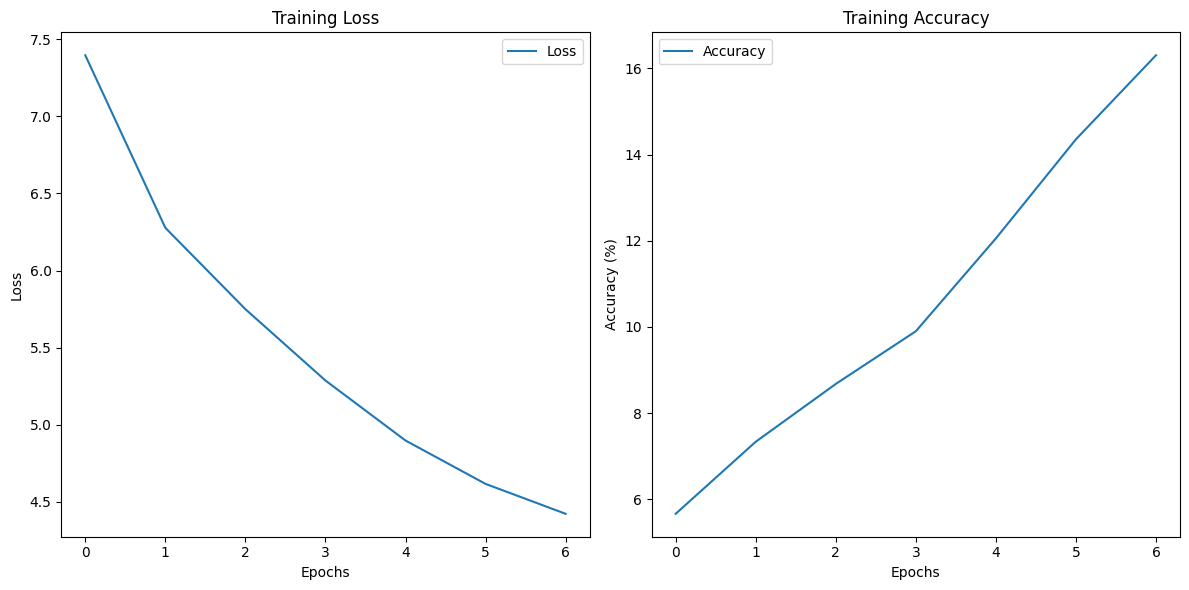

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_loss, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch_acc, label="Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training Accuracy")
plt.legend()

plt.tight_layout()
plt.show()